# Multivariable Regression for Campaign Outreach Effectiveness

## Overview

Supervised learning is a powerful machine learning method where models learn from labeled data—pairs of inputs and their corresponding correct outputs. One of the most fundamental and widely used techniques in this domain is regression analysis. The primary goal of regression is to model the relationship between a dependent variable (the outcome we want to predict) and one or more independent variables (the features or predictors).

This project focuses on Multiple Linear Regression, an extension of simple linear regression. Instead of using a single predictor, it uses multiple features to make more accurate and nuanced predictions. The underlying assumption is that a linear relationship exists between the input features $ X $ and the target variable $y$.

In a FinTech marketing context, this is particularly valuable. The success of a marketing campaign is rarely dependent on a single factor. By using multivariable regression, we can build a more holistic model that accounts for various influential variables, such as:

  Advertising spend across different channels (e.g., social media, TV, content marketing).

  Campaign outreach metrics (e.g., impressions, click-through rates).

  Market sentiment (e.g., social media mentions, customer reviews).

  Economic indicators that may influence consumer behavior.

This approach provides a more comprehensive and accurate understanding of what drives campaign effectiveness.

## Methodology:

The Multiple Linear Regression model aims to find the best-fitting linear equation that describes the data. The general form of this equation is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$

Where:

 $ y $ is the predicted output.

$x1​,x2​,…,xn​ $ are the input features .

$β0$ is the y-intercept, representing the baseline value of y when all features are zero.

$β1​,β2​,…,βn$​ are the coefficients for each feature, representing the change in y for a one-unit change in that feature, holding all others constant.

$ϵ$ is the error term, which accounts for the variability in y that cannot be explained by the linear relationship.

The model finds the optimal values for the coefficients $β0​,β1​,…,βn​$ by minimizing the Sum of Squared Errors (SSE) or Residual Sum of Squares (RSS) between the predicted values $
\hat{y}
$
and the actual values $y$. This process is typically performed using an optimization algorithm like Ordinary Least Squares (OLS).

## Multilingual Data Handling

In today's global market, FinTech companies often run campaigns across different regions and languages. To build a comprehensive model, it's crucial to integrate this diverse data. Multilingual data handling involves several preprocessing steps to ensure consistency:

  Translation and Normalization: Textual data, such as social media mentions or customer reviews from different languages, must be translated into a single common language (e.g., English).

  Text Vectorization: The translated text is then converted into a numerical format using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings (e.g., Word2Vec, GloVe). This creates a unified feature set that the model can process.

  Standardization: Numerical data from different regions (e.g., marketing spend in various currencies) must be standardized. This can involve converting currencies to a single standard (like USD) and then scaling all numerical features to have a similar range, which helps the model converge more effectively.

Once the data is transformed into a consistent numerical representation, it can be integrated into the design matrix X and used to train the multivariable regression model.

## FinTech Applications
A primary application of this model in FinTech is predicting the success of a marketing campaign for a new financial product. By considering multiple variables, a company can gain actionable insights:

  Predicting Conversion Rates: A model can predict the number of sign-ups for a new investment app based on variables like ad spend on LinkedIn, targeted email outreach, and mentions in financial news.

  Optimizing Marketing Mix: By analyzing the coefficients $(w1​,…,wn​)$, a company can determine which marketing channels or strategies have the most significant impact on campaign success and allocate their budget accordingly.

  Forecasting ROI: The model can be used to forecast the potential Return on Investment for a campaign before it is launched, helping stakeholders make data-driven decisions.

## Implementation Plan

The implementation of this model is straightforward using Python's scikit-learn library. The LinearRegression class provides an efficient way to build and train a multivariable regression model. The process involves:

  Generating the Data: Generate a dataset with multiple features into a pandas DataFrame.

  Splitting the Data: Divide the dataset into training and testing sets to ensure the model can be evaluated on unseen data.

  Training the Model: Fit the LinearRegression model to the training data.

  Making Predictions: Use the trained model to make predictions on the test data.

  Evaluate Accuracy and use data visualization.

## Evaluation Metrics

When evaluating a multivariable regression model, it's important to use a metric that accounts for the number of predictors. Standard R-squared can be misleading because it tends to increase as more variables are added, regardless of whether they improve the model.

  Adjusted R-squared (Radj2​): This is the preferred metric. It adjusts the R-squared value based on the number of independent variables in the model. The formula is:
    $$R^2_{adj} = 1 - \frac{(1 - R^2)(N - 1)}{N - p - 1}$$

  Where:

  $R^2$ is the standard R-squared.

  $N$ is the number of data points.

  $p$ is the number of predictors.

  Adjusted R-squared only increases if the new variable improves the model more than would be expected by chance, making it a more reliable measure of a multivariable model's performance.


# Code Implementation

1. Importing relevant libraries for storing the data, creating the linear regression model, plotting our results and checking the accuracy of our model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Generating synthetic data with FinTech marketing features like campaign outreach, word-of-mouth scores, and marketing spend, and then predict a "Clinical" outcome, which we can frame as a proxy for investment return in our FinTech/Marketing dataset.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 2000

campaign_outreach = np.random.uniform(100, 10000, n)
word_of_mouth = np.random.uniform(0, 10, n)            # customer advocacy score (0–10)
marketing_spend = np.random.uniform(1000, 50000, n)    # spend in Rupees
digital_engagement = np.random.uniform(0, 1, n)        # engagement rate (0–1)

# Target variable: Clinical outcome (proxy for return on investment)
clinical_outcome = (
    0.04 * campaign_outreach + # outreach has moderate effect
    1000 * word_of_mouth +     # word of mouth is very impactful
    0.25 * marketing_spend +     # spend contributes directly
    5000 * digital_engagement +   # engagement has strong influence
    np.random.normal(0, 1500, n)  # random noise
)

df = pd.DataFrame({
    "Campaign_Outreach": campaign_outreach,
    "Word_of_Mouth": word_of_mouth,
    "Marketing_Spend": marketing_spend,
    "Digital_Engagement": digital_engagement,
    "Clinical": clinical_outcome
})

print(df.shape)
print(df.head())


(2000, 5)
   Campaign_Outreach  Word_of_Mouth  Marketing_Spend  Digital_Engagement  \
0        3807.947177       2.617057     29027.798036            0.648257   
1        9512.071633       2.469788     40466.184136            0.172386   
2        7346.740024       9.062546     38247.885560            0.872395   
3        6026.718994       2.495462      8541.095330            0.613116   
4        1644.584540       2.719497      8313.224017            0.157204   

       Clinical  
0  14705.833463  
1  15520.278142  
2  20359.345902  
3   9405.072495  
4   4433.813120  


3. Use a heatmap to see the correlation between all variables. This can help identify if input variables are highly correlated with each other.

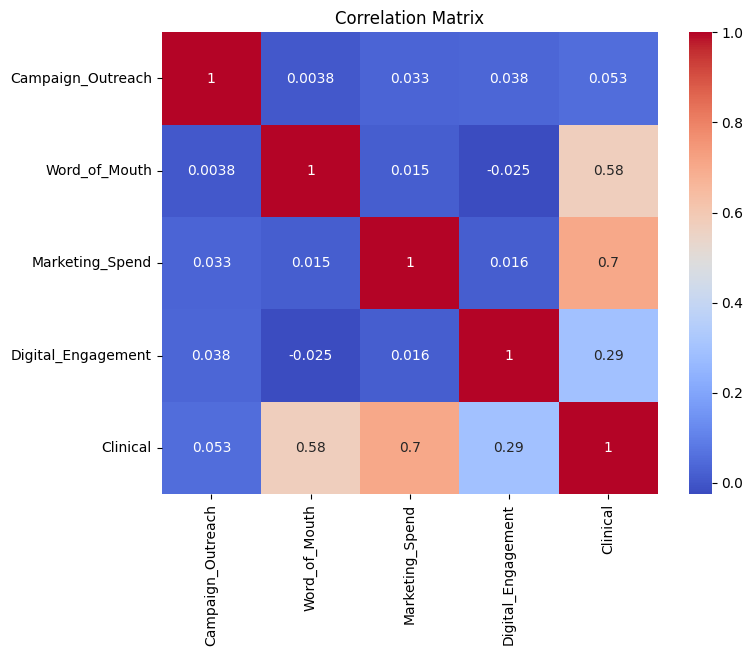

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Applying Multivariate Linear Regression

In [ ]:
X = df[["Campaign_Outreach", "Word_of_Mouth", "Marketing_Spend", "Digital_Engagement"]]
y = df["Clinical"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

5. Testing Accuracy, using adjusted R squared along with other standard metrics

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

N = X_test.shape[0]
p = X_test.shape[1]

# Calculate Adjusted R-squared
adj_r2 = 1 - (1 - r2) * (N - 1) / (N - p - 1)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared: 0.9055
Adjusted R-squared: 0.9046
Root Mean Squared Error: 1565.4862
Coefficients: [2.18330658e-02 1.00492371e+03 2.48765763e-01 5.34633632e+03]
Intercept: -54.30094124307652


6. Visualizing output through various types of plots

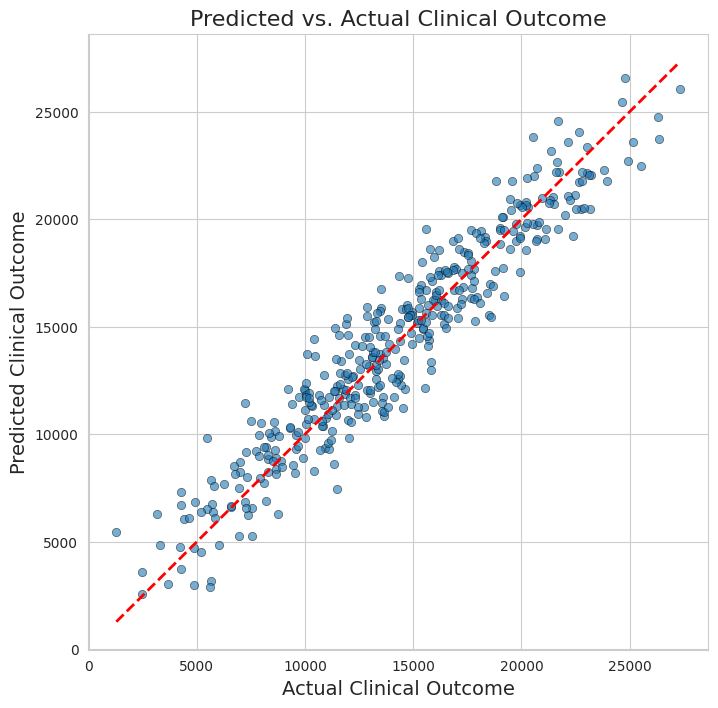

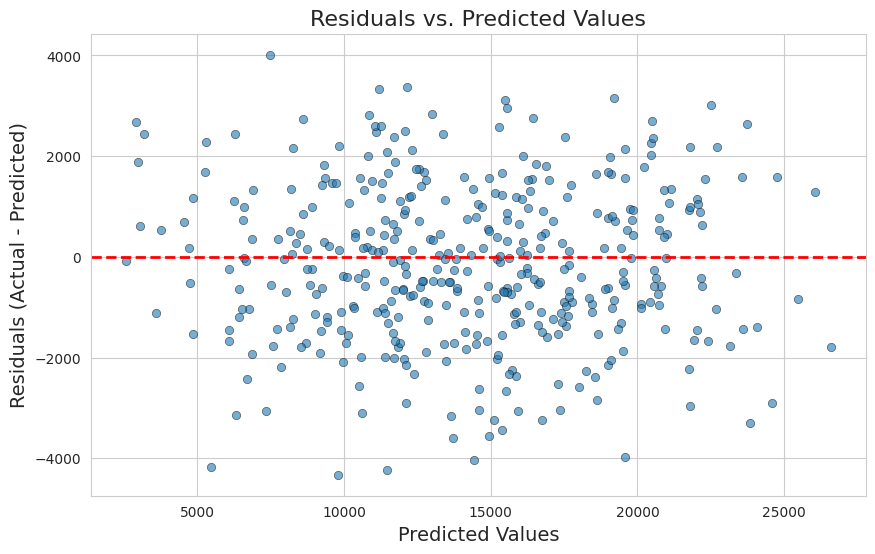

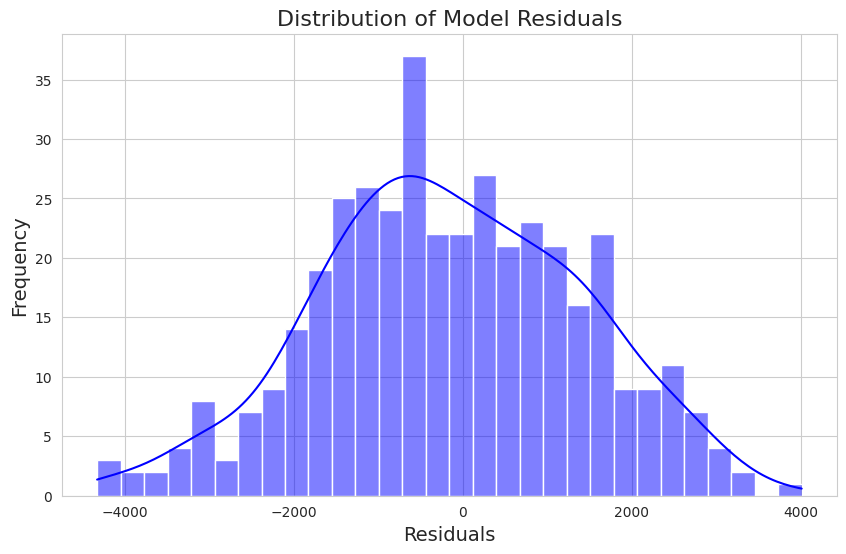

/tmp/ipython-input-2934044884.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


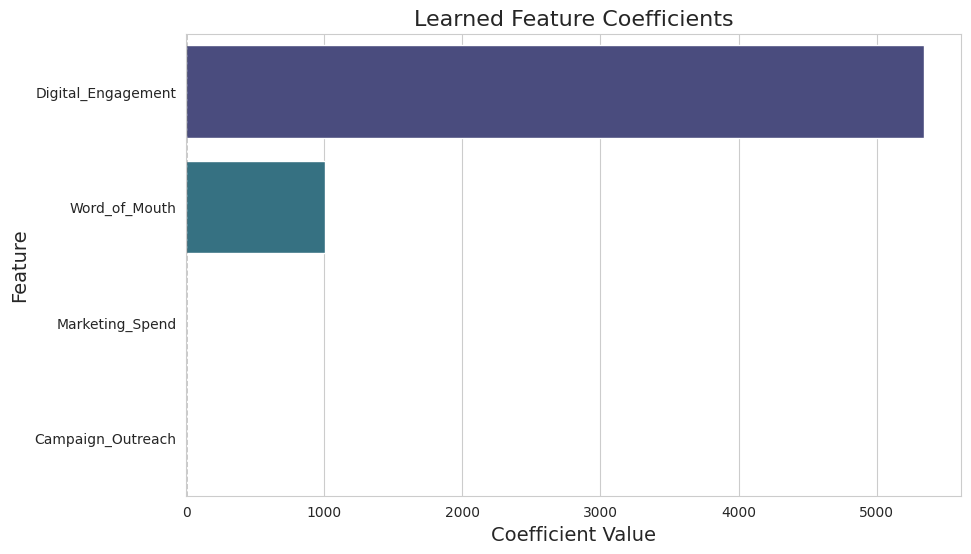

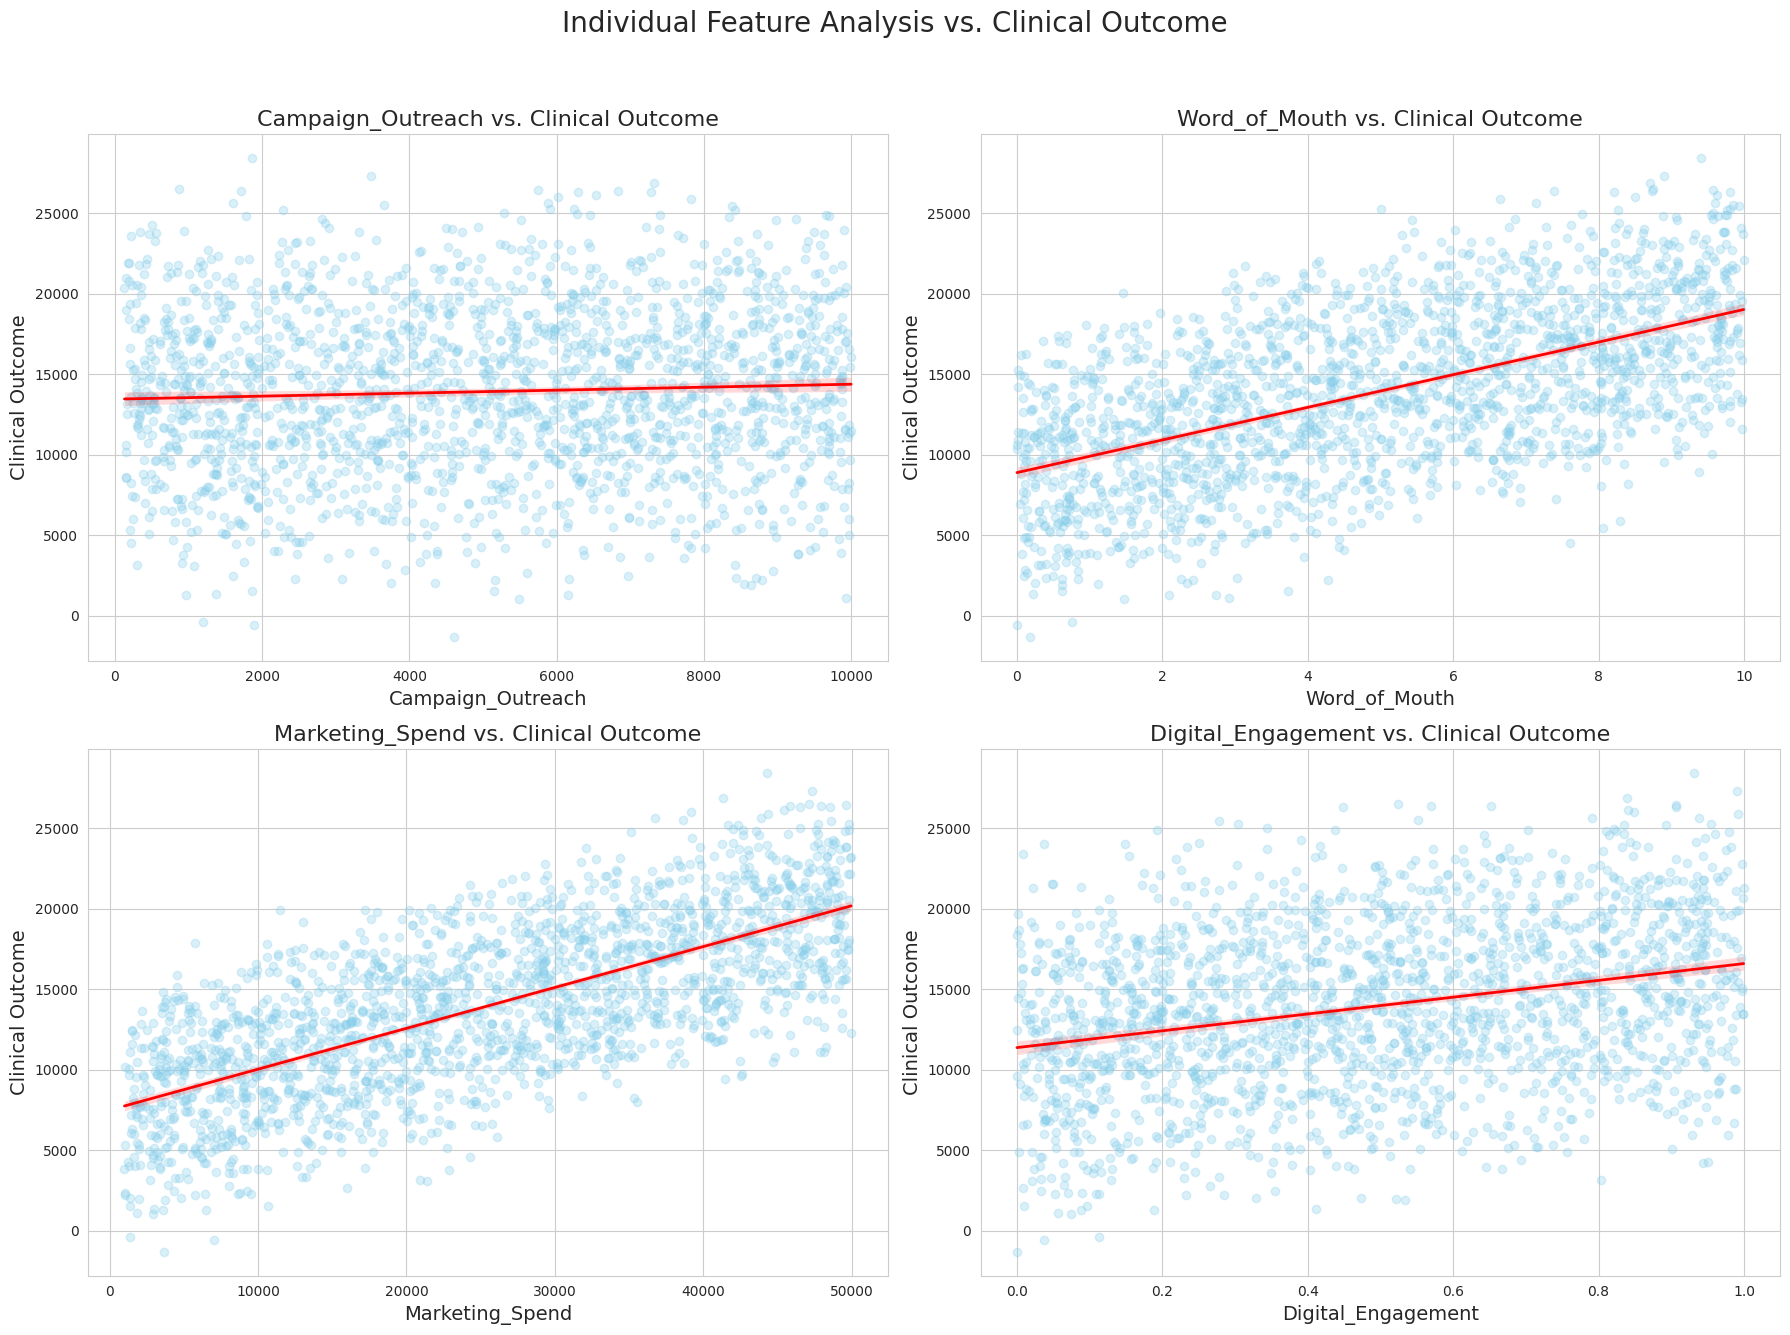

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14


#Plot 1: Predicted vs. Actual Values
# A perfect model would have all points lying on the 45-degree line.
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6, edgecolors='k')
min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red', lw=2)
plt.xlabel("Actual Clinical Outcome")
plt.ylabel("Predicted Clinical Outcome")
plt.title("Predicted vs. Actual Clinical Outcome")
plt.show()


#Plot 2- Residuals Plot
#The residuals should be randomly scattered around the horizontal line at 0.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=results_df, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.show()


#plot 3: Distribution of Residuals
# This plot helps check the assumption that the errors are normally distributed. The histogram should approximate a bell curve centered at 0.
plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='Residuals', kde=True, bins=30, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Model Residuals")
plt.show()


#Plot 4: Feature importance (coefficients plot)
# The bar chart shows the learned coefficients for each feature,making it easy to compare their relative impact on the outcome.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Learned Feature Coefficients")
plt.axvline(x=0, color='black', linestyle='--', lw=1)
plt.show()


#Plot 5: Individual Feature vs. Target with Regression Line
# These plots show the relationship of each feature with the target variable individually.
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Individual Feature Analysis vs. Clinical Outcome', fontsize=20)
features = X.columns

for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.regplot(x=df[features[i]], y=df['Clinical'], ax=ax,
                    scatter_kws={'alpha':0.3, 'color': 'skyblue'},
                    line_kws={'color': 'red', 'lw': 2})
        ax.set_title(f'{features[i]} vs. Clinical Outcome')
        ax.set_xlabel(features[i])
        ax.set_ylabel('Clinical Outcome')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

